<a href="https://colab.research.google.com/github/Firizki17/Pengolahan-Citra-Digital/blob/main/Butterworth_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Muh Firizki (Universitas MDP)

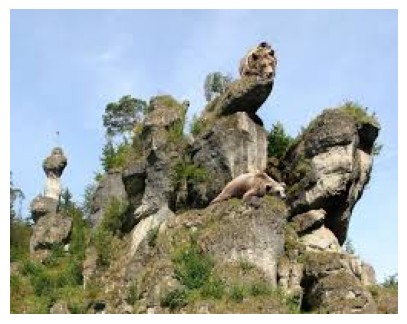

In [6]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# Download the image using requests
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQy7tILm84mxQLPOz_O4LiJxcYUTh-_-xW_aQ&s.png'
response = requests.get(image_url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Read the image data from the response content using OpenCV
image_array = np.asarray(bytearray(response.content), dtype="uint8")
# Decode the image data without converting to grayscale
F = cv2.imdecode(image_array, cv2.IMREAD_COLOR) # Decode the image data

# Convert BGR (default OpenCV color format) to RGB for matplotlib display
F = cv2.cvtColor(F, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(5,5))
plt.imshow(F)
plt.axis('off')
plt.show()


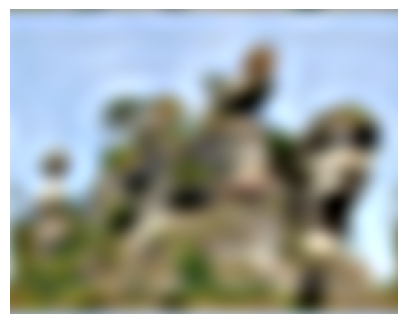

In [9]:
# Butterworth Low Pass Filter for RGB image
M, N = F.shape[:2]  # Extract image dimensions
D0 = 10  # Cutoff frequency
n = 10   # Order of the filter

# Create a 2D Butterworth filter mask
H = np.zeros((M, N), dtype=np.float32)
for u in range(M):
    for v in range(N):
        D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
        H[u, v] = 1 / (1 + (D / D0) ** n)

# Apply the Butterworth filter to each RGB channel
filtered_image = np.zeros_like(F, dtype=np.float32)

for channel in range(3):  # Apply on each of the RGB channels separately
    # Perform FFT on the image channel
    f_channel = np.fft.fftshift(np.fft.fft2(F[:, :, channel]))
    # Apply the Butterworth filter in the frequency domain
    f_filtered = f_channel * H
    # Inverse FFT to bring it back to the spatial domain
    filtered_image[:, :, channel] = np.abs(np.fft.ifft2(np.fft.ifftshift(f_filtered)))

# Clip values to valid range (0 to 255) for display
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

# Display the filtered RGB image
plt.figure(figsize=(5, 5))
plt.imshow(filtered_image)
plt.axis('off')
plt.show()


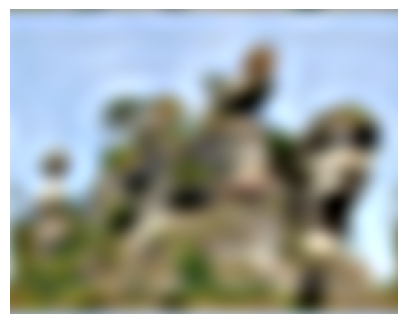

In [10]:
# Assuming F is already defined as the original image
M, N = F.shape[:2]  # Extract image dimensions

# Create the Butterworth filter as before
D0 = 10  # Cutoff frequency
n = 10   # Order of the filter
H = np.zeros((M, N), dtype=np.float32)

for u in range(M):
    for v in range(N):
        D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
        H[u, v] = 1 / (1 + (D / D0) ** n)

# Initialize an empty array for the filtered image
filtered_image = np.zeros_like(F, dtype=np.float32)

for channel in range(3):  # Process each RGB channel
    # Perform FFT on the image channel
    f_channel = np.fft.fftshift(np.fft.fft2(F[:, :, channel]))

    # Apply the Butterworth filter in the frequency domain
    Gshift = f_channel * H

    # Inverse FFT to bring it back to the spatial domain
    G = np.fft.ifftshift(Gshift)
    g_channel = np.abs(np.fft.ifft2(G))

    # Store the filtered channel
    filtered_image[:, :, channel] = g_channel

# Clip values to valid range (0 to 255) for display
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

# Display the filtered RGB image
plt.figure(figsize=(5, 5))
plt.imshow(filtered_image)
plt.axis('off')
plt.show()


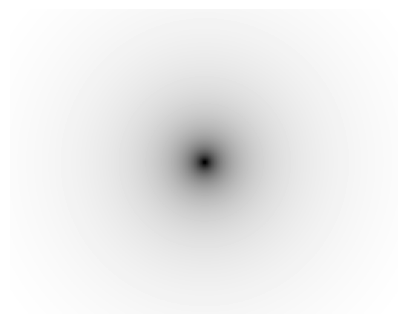

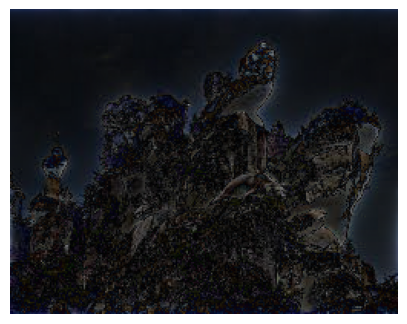

In [11]:
# Assuming F is already defined as the original image
M, N = F.shape[:2]  # Extract image dimensions

# Create the Butterworth High Pass Filter
HPF = np.zeros((M, N), dtype=np.float32)
D0 = 10  # Cutoff frequency
n = 1    # Order of the filter

for u in range(M):
    for v in range(N):
        D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
        HPF[u, v] = 1 / (1 + (D0 / D) ** n)

# Display the Butterworth High Pass Filter
plt.figure(figsize=(5, 5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

# Initialize an empty array for the filtered image
filtered_image = np.zeros_like(F, dtype=np.float32)

for channel in range(3):  # Process each RGB channel
    # Perform FFT on the image channel
    f_channel = np.fft.fftshift(np.fft.fft2(F[:, :, channel]))

    # Apply the Butterworth High Pass Filter in the frequency domain
    Gshift = f_channel * HPF

    # Inverse FFT to bring it back to the spatial domain
    G = np.fft.ifftshift(Gshift)
    g_channel = np.abs(np.fft.ifft2(G))

    # Store the filtered channel
    filtered_image[:, :, channel] = g_channel

# Clip values to valid range (0 to 255) for display
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

# Display the filtered RGB image
plt.figure(figsize=(5, 5))
plt.imshow(filtered_image)
plt.axis('off')
plt.show()
